

# Data Pre Processing

In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# load the data file
data = pd.read_csv('data6Financial.csv')

# to clean up the text
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

data = data[data['Sentiment'].isin([1, 2, 0])]

def clean_text(text):
    # change the text into lowercase
    text = text.lower()

    # Tokenization of the text
    tokens = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # remove the stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.isalnum() and word not in stop_words]

    # reassemble the text
    clean_text = ' '.join(filtered_tokens)

    return clean_text

data['Cleaned_Phrase'] = data['Phrase'].apply(clean_text)

# to convert the text format to vector format using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Cleaned_Phrase'])

# dividing the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['Sentiment'], test_size=0.2, random_state=42)

data.isnull().values.any()
data.shape
data.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gpdbs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gpdbs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gpdbs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,PhraseId,SentenceId,Phrase,Sentiment,Cleaned_Phrase
0,110715,5866,` In this poor remake of such a well loved cla...,0,poor remake well loved classic parker expose l...
1,135234,7302,Without any redeeming value whatsoever .,0,without redeeming value whatsoever
2,73266,3743,A cheap scam put together by some cynical cree...,0,cheap scam put together cynical creep revoluti...
3,78103,4020,It 's been 13 months and 295 preview screening...,0,13 month 295 preview screening since last walk...
4,82934,4282,An infuriating film .,0,infuriating film




# Data Description

## Distribution of Review Lengths

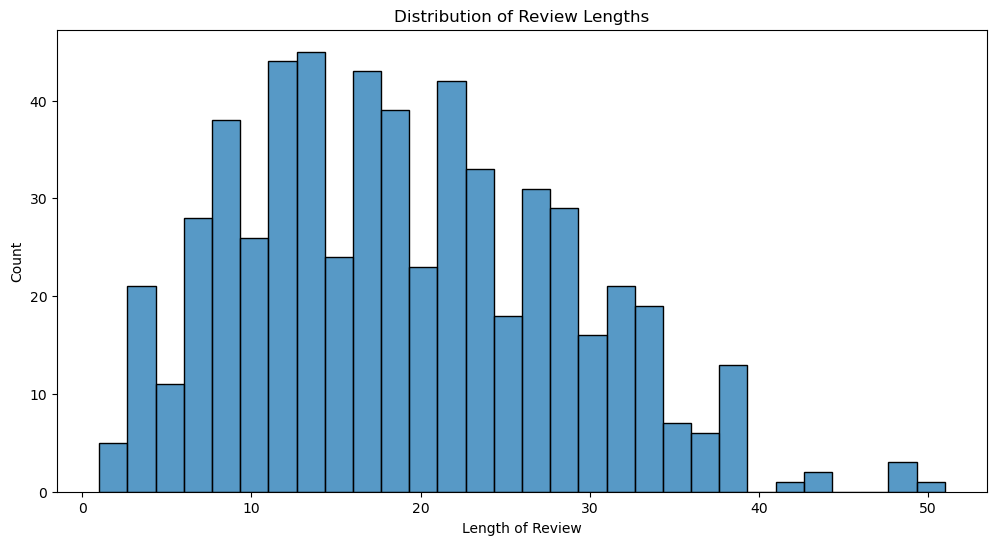

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data['length'] = data['Phrase'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.histplot(data['length'], bins=30, kde=False)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()


##Word cloud

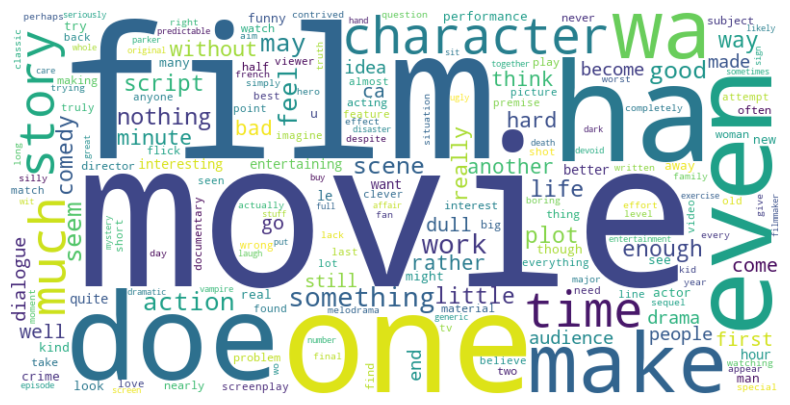

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(data['Cleaned_Phrase'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


##Frequency of Sentiment Score

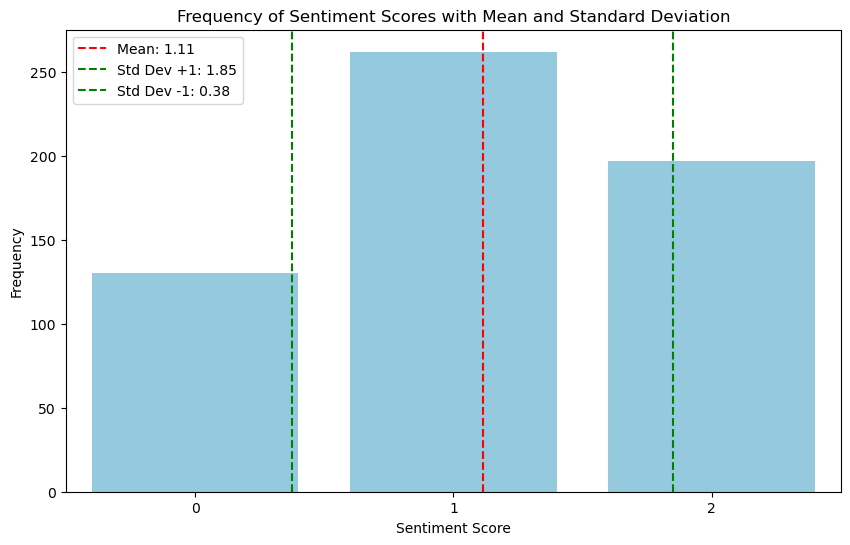

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Central Tendency
mean_sentiment = data['Sentiment'].mean()
std_deviation_sentiment = data['Sentiment'].std()

# Frequency count of each sentiment score
sentiment_counts = data['Sentiment'].value_counts().sort_index()

# Bar plot for sentiment frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, color="skyblue")
plt.axvline(x=mean_sentiment, color='r', linestyle='--', label=f'Mean: {mean_sentiment:.2f}')
plt.axvline(x=mean_sentiment + std_deviation_sentiment, color='g', linestyle='--', label=f'Std Dev +1: {mean_sentiment + std_deviation_sentiment:.2f}')
plt.axvline(x=mean_sentiment - std_deviation_sentiment, color='g', linestyle='--', label=f'Std Dev -1: {mean_sentiment - std_deviation_sentiment:.2f}')

plt.title('Frequency of Sentiment Scores with Mean and Standard Deviation')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2])  # ensure x-ticks are correctly set for sentiment scores
plt.legend()
plt.show()


# TFIDF

In [8]:
# to convert the text format to vector format using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Cleaned_Phrase'])

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['Sentiment'], test_size=0.2, random_state=42)

In [9]:
#Logistic Regression (Baseline)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Model training
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Prediction on the test data
y_pred = clf.predict(X_test)

# Model performance evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')
print(classification_report(y_test, y_pred))


Accuracy: 45.76%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.46      0.89      0.60        53
           2       0.50      0.19      0.27        37

    accuracy                           0.46       118
   macro avg       0.32      0.36      0.29       118
weighted avg       0.36      0.46      0.36       118



In [10]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# model training
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train.toarray(), y_train)

# prediction on the test data
dt_y_pred = dt_clf.predict(X_test.toarray())

# model performance evaluation
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f'Decision Tree Accuracy: {dt_accuracy*100:.2f}%')
print(classification_report(y_test, dt_y_pred))


Decision Tree Accuracy: 40.68%
              precision    recall  f1-score   support

           0       0.12      0.04      0.06        28
           1       0.46      0.49      0.48        53
           2       0.39      0.57      0.46        37

    accuracy                           0.41       118
   macro avg       0.33      0.36      0.33       118
weighted avg       0.36      0.41      0.37       118



In [11]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(X_train.toarray(), y_train)
rf_y_pred = rf_clf.predict(X_test.toarray())
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Random Forest Accuracy: {rf_accuracy*100:.2f}%')
print(classification_report(y_test, rf_y_pred))

Random Forest Accuracy: 46.61%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.54      0.66      0.59        53
           2       0.38      0.54      0.44        37

    accuracy                           0.47       118
   macro avg       0.31      0.40      0.35       118
weighted avg       0.36      0.47      0.41       118



C:\Users\gpdbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gpdbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gpdbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# @title MLP
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train.toarray(), y_train)
y_pred_mlp = mlp.predict(X_test.toarray())
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print(f'MLP Accuracy: {accuracy_mlp*100:.2f}%')
print(classification_report(y_test, y_pred_mlp))



MLP Accuracy: 44.07%
              precision    recall  f1-score   support

           0       0.20      0.11      0.14        28
           1       0.57      0.49      0.53        53
           2       0.40      0.62      0.49        37

    accuracy                           0.44       118
   macro avg       0.39      0.41      0.38       118
weighted avg       0.43      0.44      0.42       118



C:\Users\gpdbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


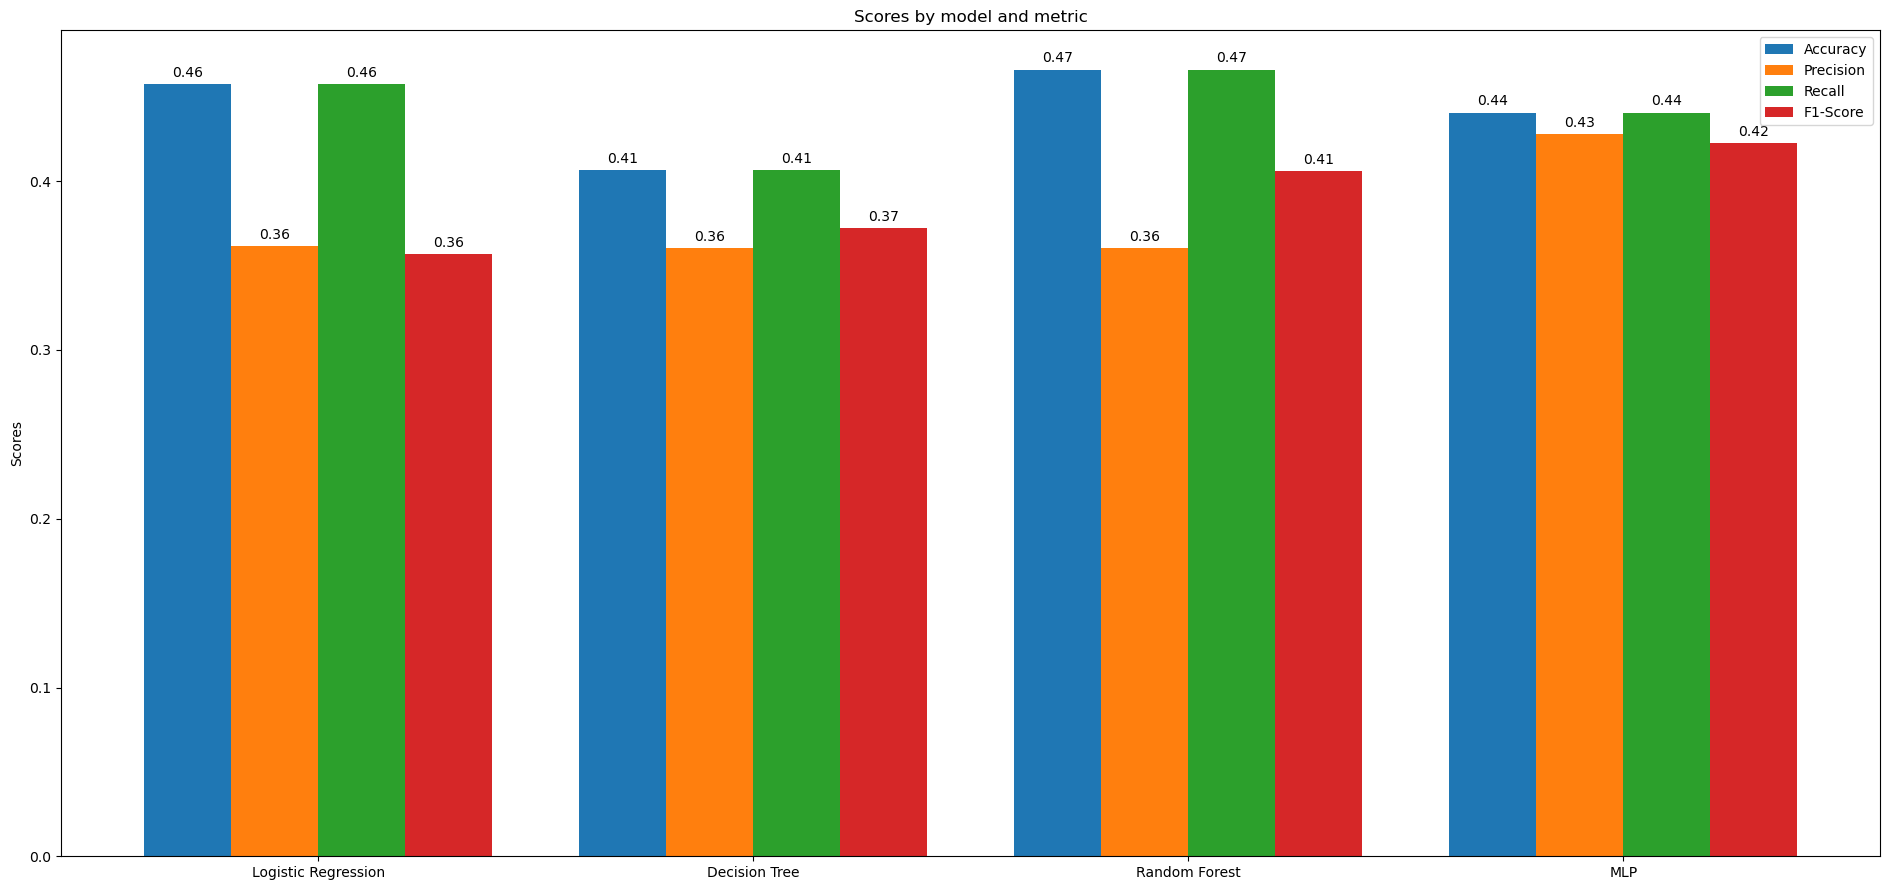

In [37]:
#Comparison TFIDF
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

lr_precision, lr_recall, lr_f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
dt_precision, dt_recall, dt_f1, _ = precision_recall_fscore_support(y_test, dt_y_pred, average='weighted')
rf_precision, rf_recall, rf_f1, _ = precision_recall_fscore_support(y_test, rf_y_pred, average='weighted')
mlp_precision, mlp_recall, mlp_f1, _ = precision_recall_fscore_support(y_test, y_pred_mlp, average='weighted')

# Combine the scores into a single data structure
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'MLP']
accuracies = [accuracy, dt_accuracy, rf_accuracy, accuracy_mlp]
precisions = [lr_precision, dt_precision, rf_precision, mlp_precision]
recalls = [lr_recall, dt_recall, rf_recall, mlp_recall]
f1_scores = [lr_f1, dt_f1, rf_f1, mlp_f1]

# Plotting
x = range(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(19, 9))
rects1 = ax.bar(x, accuracies, width, label='Accuracy')
rects2 = ax.bar([p + width for p in x], precisions, width, label='Precision')
rects3 = ax.bar([p + width*2 for p in x], recalls, width, label='Recall')
rects4 = ax.bar([p + width*3 for p in x], f1_scores, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Scores by model and metric')
ax.set_xticks([p + width*1.5 for p in x])
ax.set_xticklabels(models)
ax.legend()

# Function to add the data labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Label the bars with data labels
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()


# Word2Vec

In [14]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np
w2v_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


In [15]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        if word in w2v_model:
            vec += w2v_model[word].reshape((1, size))
            count += 1.
    if count != 0:
        vec /= count
    return vec

data['Word2Vec_Vector'] = data['Cleaned_Phrase'].apply(lambda x: word_vector(x.split(), 300))

X_w2v = np.concatenate(data['Word2Vec_Vector'].to_numpy())
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, data['Sentiment'], test_size=0.2, random_state=42)

In [16]:
# @title Logistic Regression
clf_w2v = LogisticRegression(random_state=42)
clf_w2v.fit(X_train_w2v, y_train_w2v)
y_pred_w2v = clf_w2v.predict(X_test_w2v)
accuracy_w2v = accuracy_score(y_test_w2v, y_pred_w2v)
print(f'Logistic Regression Accuracy with Word2Vec: {accuracy_w2v*100:.2f}%')
print(classification_report(y_test_w2v, y_pred_w2v))

Logistic Regression Accuracy with Word2Vec: 39.83%
              precision    recall  f1-score   support

           0       0.38      0.11      0.17        28
           1       0.40      0.53      0.46        53
           2       0.40      0.43      0.42        37

    accuracy                           0.40       118
   macro avg       0.39      0.36      0.35       118
weighted avg       0.39      0.40      0.37       118



In [17]:
# @title Decision Tree
dt_clf_w2v = DecisionTreeClassifier(random_state=42)
dt_clf_w2v.fit(X_train_w2v, y_train_w2v)
dt_y_pred_w2v = dt_clf_w2v.predict(X_test_w2v)
dt_accuracy_w2v = accuracy_score(y_test_w2v, dt_y_pred_w2v)
print(f'Decision Tree Accuracy with Word2Vec: {dt_accuracy_w2v*100:.2f}%')
print(classification_report(y_test_w2v, dt_y_pred_w2v))


Decision Tree Accuracy with Word2Vec: 36.44%
              precision    recall  f1-score   support

           0       0.22      0.21      0.22        28
           1       0.50      0.51      0.50        53
           2       0.27      0.27      0.27        37

    accuracy                           0.36       118
   macro avg       0.33      0.33      0.33       118
weighted avg       0.36      0.36      0.36       118



In [18]:
# @title Random Forest
rf_clf_w2v = RandomForestClassifier(random_state=42)
rf_clf_w2v.fit(X_train_w2v, y_train_w2v)
rf_y_pred_w2v = rf_clf_w2v.predict(X_test_w2v)
rf_accuracy_w2v = accuracy_score(y_test_w2v, rf_y_pred_w2v)
print(f'Random Forest Accuracy with Word2Vec: {rf_accuracy_w2v*100:.2f}%')
print(classification_report(y_test_w2v, rf_y_pred_w2v))


Random Forest Accuracy with Word2Vec: 42.37%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.44      0.77      0.56        53
           2       0.43      0.24      0.31        37

    accuracy                           0.42       118
   macro avg       0.29      0.34      0.29       118
weighted avg       0.33      0.42      0.35       118



In [19]:
# @title MLP
mlp_w2v = MLPClassifier(random_state=42)
mlp_w2v.fit(X_train_w2v, y_train_w2v)
y_pred_mlp_w2v = mlp_w2v.predict(X_test_w2v)
accuracy_mlp_w2v = accuracy_score(y_test_w2v, y_pred_mlp_w2v)
print(f'MLP Accuracy with Word2Vec: {accuracy_mlp_w2v*100:.2f}%')
print(classification_report(y_test_w2v, y_pred_mlp_w2v))

MLP Accuracy with Word2Vec: 41.53%
              precision    recall  f1-score   support

           0       0.40      0.29      0.33        28
           1       0.45      0.45      0.45        53
           2       0.38      0.46      0.41        37

    accuracy                           0.42       118
   macro avg       0.41      0.40      0.40       118
weighted avg       0.42      0.42      0.41       118



C:\Users\gpdbs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


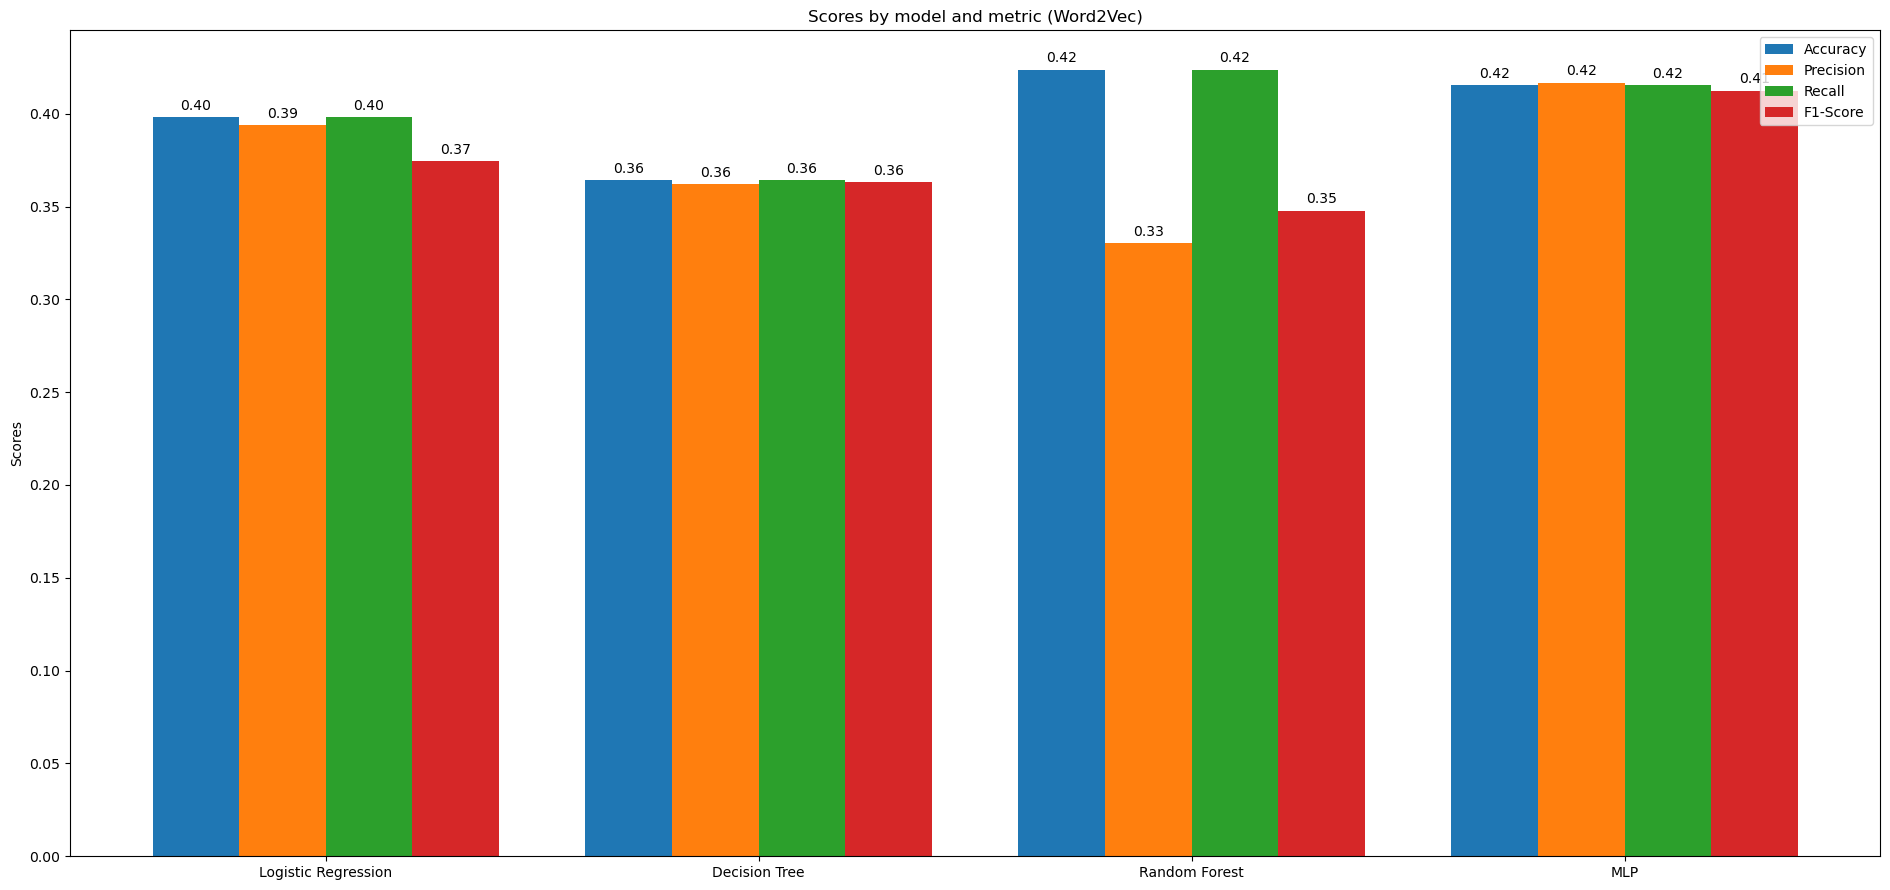

In [20]:
# @title  COMPARISON WORD2VEC
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Calculate precision, recall, and F1-scores for each model
w2v_lr_precision, w2v_lr_recall, w2v_lr_f1, _ = precision_recall_fscore_support(y_test_w2v, y_pred_w2v, average='weighted')
w2v_dt_precision, w2v_dt_recall, w2v_dt_f1, _ = precision_recall_fscore_support(y_test_w2v, dt_y_pred_w2v, average='weighted')
w2v_rf_precision, w2v_rf_recall, w2v_rf_f1, _ = precision_recall_fscore_support(y_test_w2v, rf_y_pred_w2v, average='weighted')
w2v_mlp_precision, w2v_mlp_recall, w2v_mlp_f1, _ = precision_recall_fscore_support(y_test_w2v, y_pred_mlp_w2v, average='weighted')

# Combine the scores into a single data structure
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'MLP']
w2v_accuracies = [accuracy_w2v, dt_accuracy_w2v, rf_accuracy_w2v, accuracy_mlp_w2v]
w2v_precisions = [w2v_lr_precision, w2v_dt_precision, w2v_rf_precision, w2v_mlp_precision]
w2v_recalls = [w2v_lr_recall, w2v_dt_recall, w2v_rf_recall, w2v_mlp_recall]
w2v_f1_scores = [w2v_lr_f1, w2v_dt_f1, w2v_rf_f1, w2v_mlp_f1]

# Plotting
x = range(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(19, 9))
rects1 = ax.bar(x, w2v_accuracies, width, label='Accuracy')
rects2 = ax.bar([p + width for p in x], w2v_precisions, width, label='Precision')
rects3 = ax.bar([p + width*2 for p in x], w2v_recalls, width, label='Recall')
rects4 = ax.bar([p + width*3 for p in x], w2v_f1_scores, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Scores by model and metric (Word2Vec)')
ax.set_xticks([p + width*1.5 for p in x])
ax.set_xticklabels(models)
ax.legend()

# Function to add the data labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Label the bars with data labels
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()


# Glove

In [21]:
glove_file = 'glove.6B.100d.txt'
with open(glove_file, 'rt', encoding='UTF8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
        line = line.strip().split()
        curr_word = line[0]
        words.add(curr_word)
        word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)

def get_sentence_vector(sentence, model, vector_size):
    vector = np.zeros(vector_size)
    count1 = 0
    for word1 in sentence.split():
        if word1 in model:
            vector += model[word1]
            count1 += 1
    if count1 != 0:
        vector /= count1
    return vector
data['GloVe_Vector'] = data['Cleaned_Phrase'].apply(lambda x: get_sentence_vector(x, word_to_vec_map, 100))
X_glove = np.array(data['GloVe_Vector'].tolist())

X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X_glove, data['Sentiment'], test_size=0.2, random_state=42)

In [22]:
# @title Logistic Regression
clf_glove = LogisticRegression(random_state=42)
clf_glove.fit(X_train_glove, y_train_glove)
y_pred_glove = clf_glove.predict(X_test_glove)
clf_accuracy_glove = accuracy_score(y_test_glove, y_pred_glove)
print(f'Logistic Regression Accuracy with GloVe: {clf_accuracy_glove*100:.2f}%')
print(classification_report(y_test_glove, y_pred_glove))

Logistic Regression Accuracy with GloVe: 40.68%
              precision    recall  f1-score   support

           0       0.50      0.14      0.22        28
           1       0.41      0.55      0.47        53
           2       0.38      0.41      0.39        37

    accuracy                           0.41       118
   macro avg       0.43      0.37      0.36       118
weighted avg       0.42      0.41      0.39       118



In [23]:
# @title Decision Tree
dt_clf_glove = DecisionTreeClassifier(random_state=42)
dt_clf_glove.fit(X_train_glove, y_train_glove)
dt_y_pred_glove = dt_clf_glove.predict(X_test_glove)
dt_accuracy_glove = accuracy_score(y_test_glove, dt_y_pred_glove)
print(f'Decision Tree Accuracy with GloVe: {dt_accuracy_glove*100:.2f}%')
print(classification_report(y_test_glove, dt_y_pred_glove))

Decision Tree Accuracy with GloVe: 32.20%
              precision    recall  f1-score   support

           0       0.32      0.36      0.34        28
           1       0.37      0.32      0.34        53
           2       0.27      0.30      0.28        37

    accuracy                           0.32       118
   macro avg       0.32      0.33      0.32       118
weighted avg       0.33      0.32      0.32       118



In [24]:
# @title Random Forest
rf_clf_glove = RandomForestClassifier(random_state=42)
rf_clf_glove.fit(X_train_glove, y_train_glove)
rf_y_pred_glove = rf_clf_glove.predict(X_test_glove)
rf_accuracy_glove = accuracy_score(y_test_glove, rf_y_pred_glove)
print(f'Random Forest Accuracy with GloVe: {rf_accuracy_glove*100:.2f}%')
print(classification_report(y_test_glove, rf_y_pred_glove))

Random Forest Accuracy with GloVe: 45.76%
              precision    recall  f1-score   support

           0       0.50      0.07      0.12        28
           1       0.47      0.74      0.57        53
           2       0.42      0.35      0.38        37

    accuracy                           0.46       118
   macro avg       0.46      0.39      0.36       118
weighted avg       0.46      0.46      0.41       118



In [25]:
# @title MLP
mlp_glove = MLPClassifier(random_state=42)
mlp_glove.fit(X_train_glove, y_train_glove)
y_pred_mlp_glove = mlp_glove.predict(X_test_glove)
accuracy_mlp_glove = accuracy_score(y_test_glove, y_pred_mlp_glove)
print(f'MLP Accuracy with GloVe: {accuracy_mlp_glove*100:.2f}%')
print(classification_report(y_test_glove, y_pred_mlp_glove))


MLP Accuracy with GloVe: 42.37%
              precision    recall  f1-score   support

           0       0.47      0.29      0.36        28
           1       0.48      0.49      0.49        53
           2       0.34      0.43      0.38        37

    accuracy                           0.42       118
   macro avg       0.43      0.40      0.41       118
weighted avg       0.43      0.42      0.42       118



C:\Users\gpdbs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


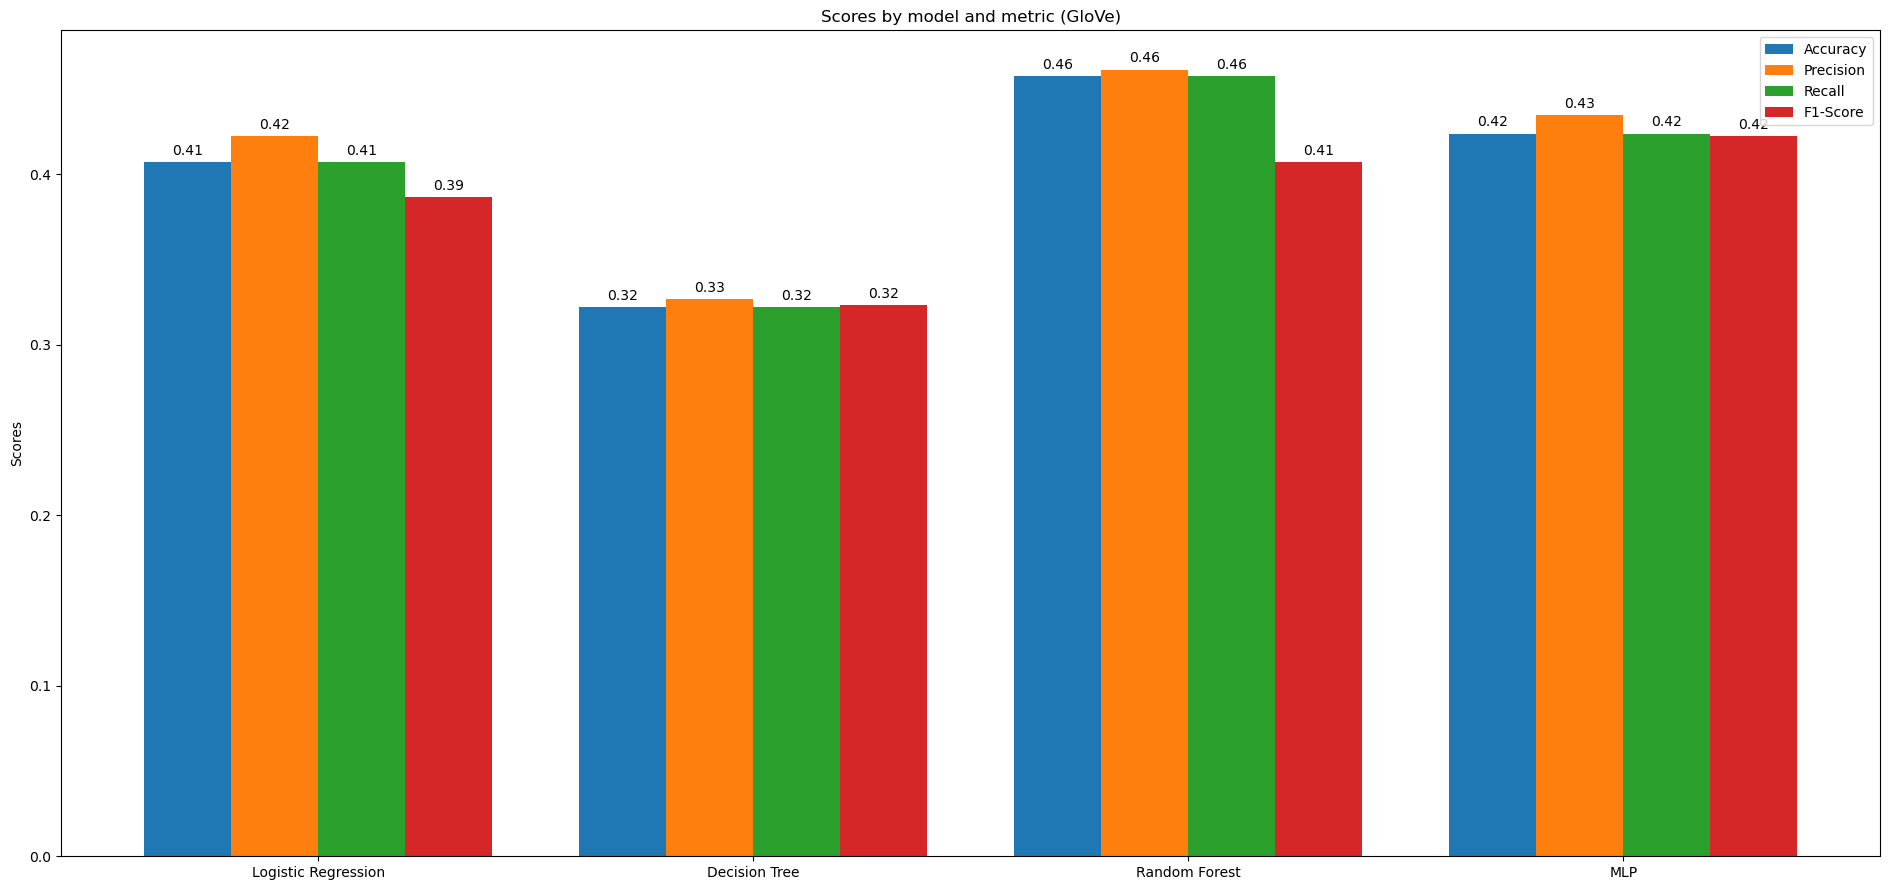

In [26]:
# @title  COMPARISON GLOVE

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Calculate precision, recall, and F1-scores for each model
glove_lr_precision, glove_lr_recall, glove_lr_f1, _ = precision_recall_fscore_support(y_test_glove, y_pred_glove, average='weighted')
glove_dt_precision, glove_dt_recall, glove_dt_f1, _ = precision_recall_fscore_support(y_test_glove, dt_y_pred_glove, average='weighted')
glove_rf_precision, glove_rf_recall, glove_rf_f1, _ = precision_recall_fscore_support(y_test_glove, rf_y_pred_glove, average='weighted')
glove_mlp_precision, glove_mlp_recall, glove_mlp_f1, _ = precision_recall_fscore_support(y_test_glove, y_pred_mlp_glove, average='weighted')

# Combine the scores into a single data structure
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'MLP']
glove_accuracies = [clf_accuracy_glove, dt_accuracy_glove, rf_accuracy_glove, accuracy_mlp_glove]
glove_precisions = [glove_lr_precision, glove_dt_precision, glove_rf_precision, glove_mlp_precision]
glove_recalls = [glove_lr_recall, glove_dt_recall, glove_rf_recall, glove_mlp_recall]
glove_f1_scores = [glove_lr_f1, glove_dt_f1, glove_rf_f1, glove_mlp_f1]

# Plotting
x = range(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(19, 9))
rects1 = ax.bar(x, glove_accuracies, width, label='Accuracy')
rects2 = ax.bar([p + width for p in x], glove_precisions, width, label='Precision')
rects3 = ax.bar([p + width*2 for p in x], glove_recalls, width, label='Recall')
rects4 = ax.bar([p + width*3 for p in x], glove_f1_scores, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Scores by model and metric (GloVe)')
ax.set_xticks([p + width*1.5 for p in x])
ax.set_xticklabels(models)
ax.legend()

# Function to add the data labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Label the bars with data labels
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()


# Baseline improvement

In [27]:
# @title Baseline parameters
clf_hp = LogisticRegression(random_state=42,
                         penalty='l1',
                         C=2.0,
                         solver='saga',
                         max_iter=1000,
                         class_weight=None,
                         multi_class='ovr',
                         n_jobs=None
                         )
clf_hp.fit(X_train, y_train)
y_pred1 = clf_hp.predict(X_test)
accuracy_hp = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy_hp*100:.2f}%')
print(classification_report(y_test, y_pred1))


Accuracy: 48.31%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.48      0.91      0.62        53
           2       0.56      0.24      0.34        37

    accuracy                           0.48       118
   macro avg       0.35      0.38      0.32       118
weighted avg       0.39      0.48      0.39       118



We improved parameters of Decision Tree to improve its perfomance, because we will use it in Voting Classifier.

In [28]:
# @title Parameters improvement of the model that will be used in Voting
dt_clf_im = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=50,
    min_samples_split=3,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.5,
    max_features=3,
    max_leaf_nodes=5,
    min_impurity_decrease=0.5,
    ccp_alpha=0.2,
    random_state=42)
dt_clf_im.fit(X_train.toarray(), y_train)
dt_y_pred_im = dt_clf_im.predict(X_test.toarray())
dt_accuracy_im = accuracy_score(y_test, dt_y_pred_im)
print(f'Decision Tree Accuracy: {dt_accuracy_im*100:.2f}%')
print(classification_report(y_test, dt_y_pred_im))


Decision Tree Accuracy: 44.92%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.45      1.00      0.62        53
           2       0.00      0.00      0.00        37

    accuracy                           0.45       118
   macro avg       0.15      0.33      0.21       118
weighted avg       0.20      0.45      0.28       118



C:\Users\gpdbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gpdbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gpdbs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here are used baseline with parameters, random forest, improved decision tree

In [29]:
# @title Final improved model using Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV

models = [
    ('lr', clf_hp),
    ('rf', rf_clf),
    ('df', dt_clf_im)

]
voting_clf = VotingClassifier(estimators=models, voting='soft', weights=[5, 2, 1])  # Установка весов для взвешенного голосования
voting_clf.fit(X_train, y_train)
y_pred2 = voting_clf.predict(X_test)
accuracy_vt = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy_vt*100:.2f}%')
print(classification_report(y_test, y_pred2))


Accuracy: 50.85%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.51      0.83      0.63        53
           2       0.52      0.43      0.47        37

    accuracy                           0.51       118
   macro avg       0.34      0.42      0.37       118
weighted avg       0.39      0.51      0.43       118



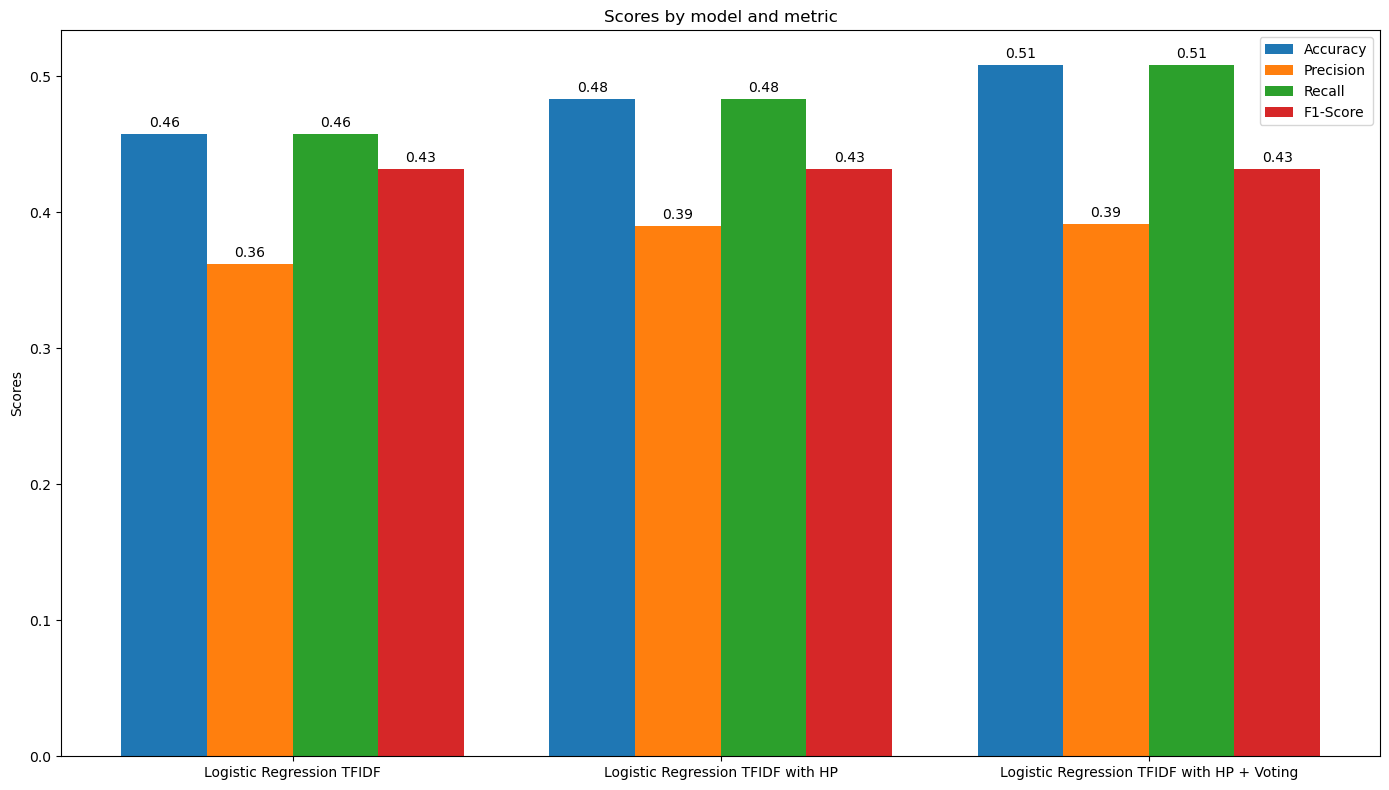

In [38]:
# @title Comparison accuracy of baseline versions
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-scores for each model
precision_0, recall_0, f1_0, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
precision_1, recall_1, f1_0, _ = precision_recall_fscore_support(y_test, y_pred1, average='weighted')
precision_2, recall_2, f1_0, _ = precision_recall_fscore_support(y_test, y_pred2, average='weighted')

# Combine the scores into a single data structure
models = ['Logistic Regression TFIDF', 'Logistic Regression TFIDF with HP', 'Logistic Regression TFIDF with HP + Voting']
accuracies = [accuracy, accuracy_hp, accuracy_vt]
precisions = [precision_0, precision_1, precision_2]
recalls = [recall_0, recall_1, recall_2]
f1_scores = [f1_0, f1_0, f1_0]

# Plotting
x = range(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x, accuracies, width, label='Accuracy')
rects2 = ax.bar([p + width for p in x], precisions, width, label='Precision')
rects3 = ax.bar([p + width*2 for p in x], recalls, width, label='Recall')
rects4 = ax.bar([p + width*3 for p in x], f1_scores, width, label='F1-Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by model and metric')
ax.set_xticks([p + width*1.5 for p in x])
ax.set_xticklabels(models)
ax.legend()

# Function to add the data labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Label the bars with data labels
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()


Red color shows the worst perfomed model overall, while yellow shows all versions of the baseline models. Green is the best model among all - in our case final baseline improved model.

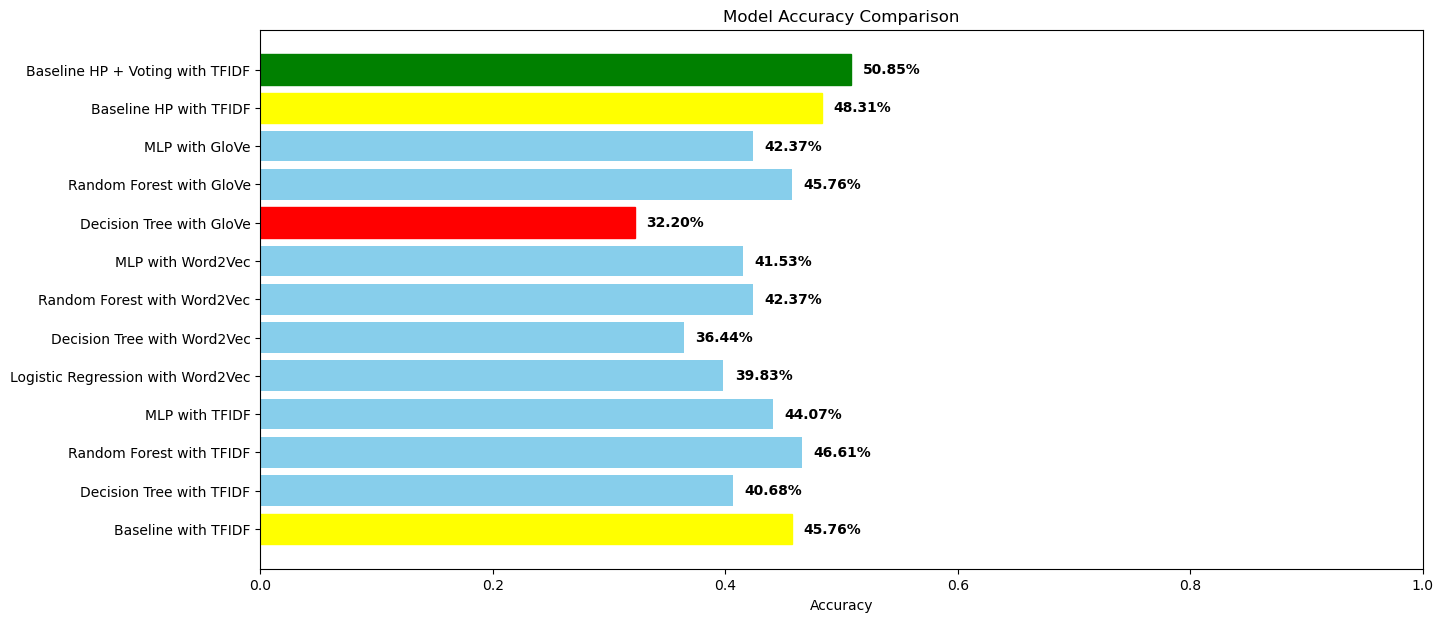

In [31]:
import matplotlib.pyplot as plt

# model accuracies
accuracies = [
    accuracy, dt_accuracy, rf_accuracy, accuracy_mlp,
    accuracy_w2v, dt_accuracy_w2v, rf_accuracy_w2v, accuracy_mlp_w2v,
    dt_accuracy_glove, rf_accuracy_glove, accuracy_mlp_glove, accuracy_hp, accuracy_vt,
]

# name of the models
labels = [
    'Baseline with TFIDF', 'Decision Tree with TFIDF', 'Random Forest with TFIDF', 'MLP with TFIDF',
    'Logistic Regression with Word2Vec', 'Decision Tree with Word2Vec', 'Random Forest with Word2Vec', 'MLP with Word2Vec',
    'Decision Tree with GloVe', 'Random Forest with GloVe', 'MLP with GloVe', 'Baseline HP with TFIDF', 'Baseline HP + Voting with TFIDF'
]

max_acc = max(accuracies)
min_acc = min(accuracies)

# Creating a graph
plt.figure(figsize=(15, 7))

bars = plt.barh(labels, accuracies, color='skyblue')

for i, bar in enumerate(bars):
    if accuracies[i] == max_acc:
        bar.set_color('green')
    elif accuracies[i] == min_acc:
        bar.set_color('red')
    elif labels[i] in ['Baseline with TFIDF', 'Baseline HP + Voting with TFIDF', 'Baseline HP with TFIDF']:
        bar.set_color('yellow')

plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim([0, 1])
for i, v in enumerate(accuracies):
    plt.text(v + 0.01, i, f'{v*100:.2f}%', va='center', color='black', fontweight='bold')
plt.show()


# Accuracy comparison

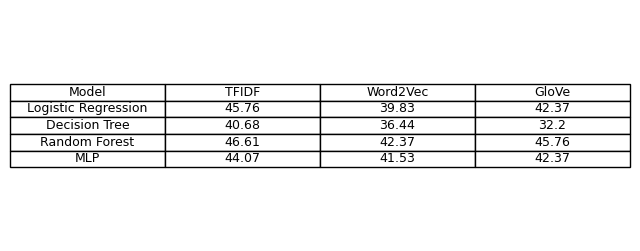

In [32]:
# @title Tabular

import pandas as pd
import matplotlib.pyplot as plt

# Round the values ​​to two decimal places
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'MLP'],

    'TFIDF': [round(accuracy*100, 2), round(dt_accuracy*100, 2), round(rf_accuracy*100, 2), round(accuracy_mlp*100, 2)],

    'Word2Vec': [round(accuracy_w2v*100, 2), round(dt_accuracy_w2v*100, 2), round(rf_accuracy_w2v*100, 2), round(accuracy_mlp_w2v*100, 2)],

    'GloVe': [round(accuracy_mlp_glove*100, 2), round(dt_accuracy_glove*100, 2), round(rf_accuracy_glove*100, 2), round(accuracy_mlp_glove*100, 2)]
}

results_df = pd.DataFrame(results)

# Setting boundaries
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Table visualization
fig, ax = plt.subplots(figsize=(8, 3)) # graph dimensions
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
plt.show()


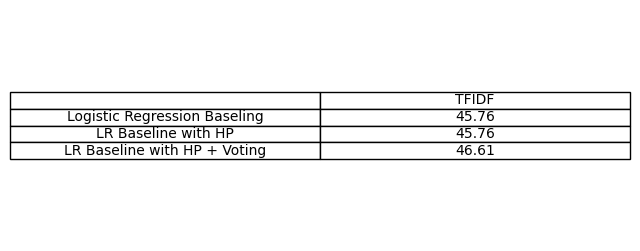

In [33]:
# @title Tabular

import pandas as pd
import matplotlib.pyplot as plt

# Round the values ​​to two decimal places
results = {
    '': ['Logistic Regression Baseling', 'LR Baseline with HP', 'LR Baseline with HP + Voting'],

    'TFIDF': [round(accuracy*100, 2), round(accuracy*100, 2), round(rf_accuracy*100, 2)]
}

results_df = pd.DataFrame(results)

# Setting boundaries
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Table visualization
fig, ax = plt.subplots(figsize=(8, 3)) # graph dimensions
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
plt.show()
